In [152]:
# 1. Загрузить данные Market_Basket_Optimisation.csv
import pandas as pd

df = pd.read_csv("datasets/pr8/Market_Basket_Optimisation.csv")

df.info()

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

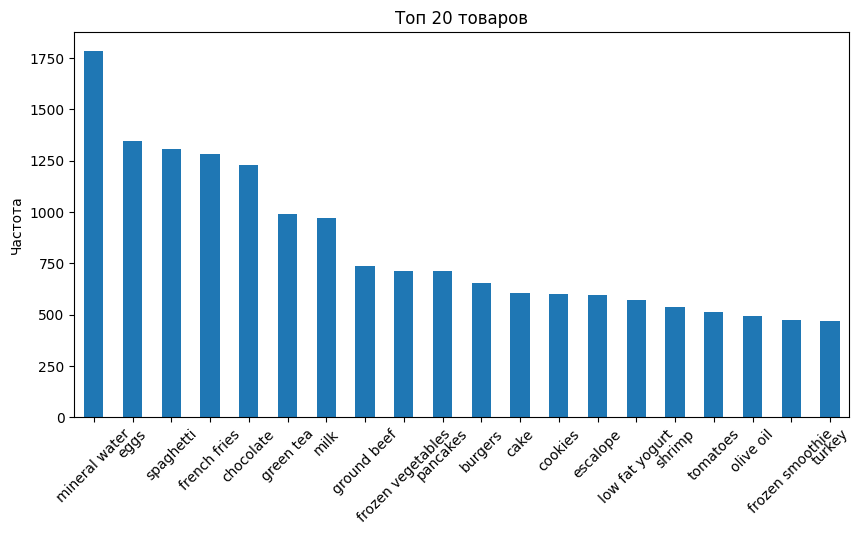

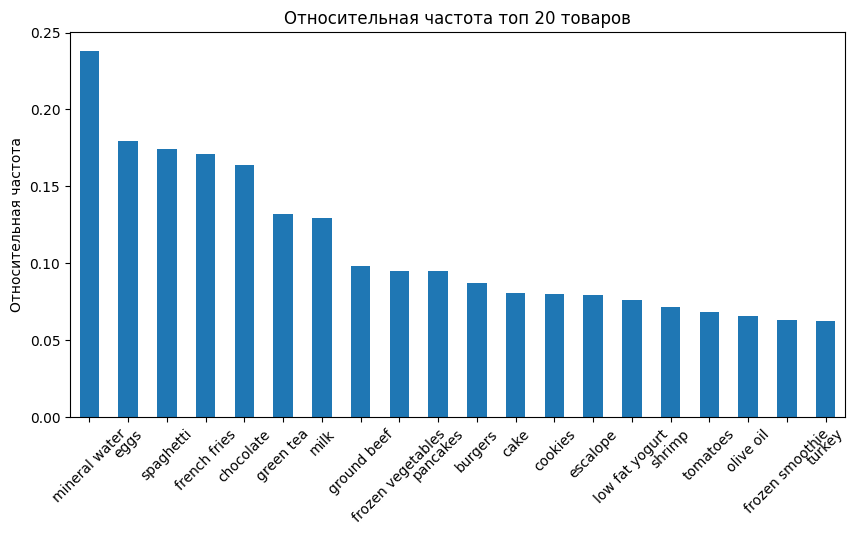

In [153]:
# 2. Визуализировать данные (отразить на гистограммах относительную
# и фактическую частоту встречаемости для 20 наиболее популярных товаров).
from collections import Counter
import matplotlib.pyplot as plt

items = df.stack().value_counts()
t20 = items.head(20)

plt.figure(figsize=(10,5))
t20.plot(kind='bar')
plt.title('Топ 20 товаров')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

rel = t20 / len(df)
plt.figure(figsize=(10,5))
rel.plot(kind='bar')
plt.title('Относительная частота топ 20 товаров')
plt.ylabel('Относительная частота')
plt.xticks(rotation=45)
plt.show()

In [169]:
# 3. Применить алгоритм Apriori, используя 3 разные библиотеки
# (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для
# алгоритмов так, чтобы выводилось порядка 10 наилучших правил.
from collections import Counter
import time

import pandas as pd
import matplotlib.pyplot as plt
from apriori_python import apriori as apriori_python
from apyori import apriori as apriori_apyori
from efficient_apriori import apriori as efficient_apriori
from fpgrowth_py import fpgrowth

def p10(rules):
    print(len(rules))
    for rule in sorted(rules, key=lambda r: r[2], reverse=True):
        print(rule)

def pf10(results):
    print(len(rules))
    for result in sorted(list(results), key=lambda r: r[2], reverse=True)[:10]:
        for subset in result[2]:
            print(subset[0], subset[1])
            print(f"Support: {result[1]}, Confidence: {subset[2]}, Lift: {subset[3]}")

def pe10(rules):
    print(len(rules))
    for rule in sorted(rules, key=lambda r: r.confidence, reverse=True):
        print(rule)

# позиции корзины (товары в покупке) – транзакции
transactions = df.stack().groupby(level=0).apply(list).tolist()

t_sec = dict()

min_sup = 0.0068
min_conf = 0.5

start = time.perf_counter()
itemsets, rules = apriori_python(transactions, minSup=min_sup, minConf=min_conf)
t_sec['apriori_python'] = time.perf_counter() - start
print('apriori_python')
# формат вывода: [{'<Предпосылка>'}, {'<Правило>'}, '<Confidence>']
p10(rules)
print()

start = time.perf_counter()
results = apriori_apyori(transactions, min_support=min_sup, min_confidence=min_conf)
t_sec['apyori'] = time.perf_counter() - start
print('apyori')
pf10(list(results))
print()

start = time.perf_counter()
itemsets, rules = efficient_apriori(transactions, min_support=min_sup, min_confidence=min_conf)
print('efficient_apriori')
t_sec['efficient'] = time.perf_counter() - start
pe10(rules)

apriori_python
10
[{'milk', 'soup'}, {'mineral water'}, 0.5614035087719298]
[{'ground beef', 'frozen vegetables'}, {'mineral water'}, 0.5433070866141733]
[{'soup', 'spaghetti'}, {'mineral water'}, 0.5233644859813084]
[{'chicken', 'chocolate'}, {'mineral water'}, 0.5181818181818182]
[{'ground beef', 'pancakes'}, {'mineral water'}, 0.5137614678899083]
[{'ground beef', 'frozen vegetables'}, {'spaghetti'}, 0.5118110236220472]
[{'ground beef', 'eggs'}, {'mineral water'}, 0.5066666666666667]
[{'salmon', 'spaghetti'}, {'mineral water'}, 0.504950495049505]
[{'chocolate', 'olive oil'}, {'mineral water'}, 0.5040650406504065]
[{'ground beef', 'milk'}, {'mineral water'}, 0.503030303030303]

apyori
10
frozenset({'chicken', 'chocolate'}) frozenset({'mineral water'})
Support: 0.0076, Confidence: 0.5181818181818182, Lift: 2.174797781960625
frozenset({'chocolate', 'olive oil'}) frozenset({'mineral water'})
Support: 0.008266666666666667, Confidence: 0.5040650406504065, Lift: 2.115549974749887
frozenset(

In [168]:
# 4. Применить алгоритм FP-Growth из библиотеки fpgrowth_py.
# Подобрать гиперпараметры для алгоритма так,
# чтобы выводилось порядка 10 наилучших правил.
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.0068, minConf=0.5)
# формат вывода: [{'<Предпосылка>'}, {'<Правило>'}, '<Confidence>']
t_sec['FP-Growth'] = time.perf_counter() - start
p10(rules)

10
[{'milk', 'soup'}, {'mineral water'}, 0.5614035087719298]
[{'ground beef', 'frozen vegetables'}, {'mineral water'}, 0.5433070866141733]
[{'soup', 'spaghetti'}, {'mineral water'}, 0.5233644859813084]
[{'chicken', 'chocolate'}, {'mineral water'}, 0.5181818181818182]
[{'ground beef', 'pancakes'}, {'mineral water'}, 0.5137614678899083]
[{'ground beef', 'frozen vegetables'}, {'spaghetti'}, 0.5118110236220472]
[{'ground beef', 'eggs'}, {'mineral water'}, 0.5066666666666667]
[{'salmon', 'spaghetti'}, {'mineral water'}, 0.504950495049505]
[{'chocolate', 'olive oil'}, {'mineral water'}, 0.5040650406504065]
[{'ground beef', 'milk'}, {'mineral water'}, 0.503030303030303]


{'apriori_python': 2.975056250113994, 'apyori': 3.174995072185993e-05, 'efficient': 0.03015216696076095, 'FP-Growth': 0.8690115420613438}


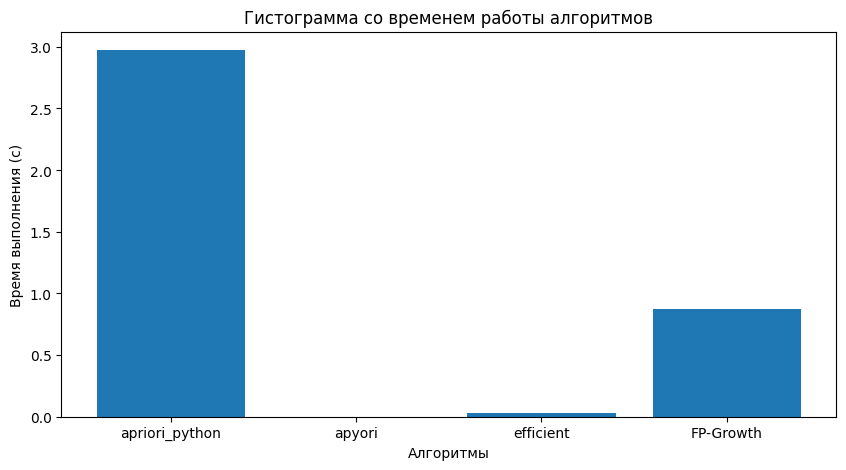

In [67]:
# 5. Сравнить время выполнения всех алгоритмов и построить гистограмму.

print(t_sec)

plt.figure(figsize=(10,5))
plt.bar(t_sec.keys(), [round(v, 3) for v in t_sec.values()])
plt.title('Гистограмма со временем работы алгоритмов')
plt.xlabel('Алгоритмы')
plt.ylabel('Время выполнения (с)')
plt.show()

In [147]:
# 6. Загрузить данные data.csv.
import pandas as pd

df = pd.read_csv("datasets/pr8/data.csv")

df.info()

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        9207 non-null   object
 1   Unnamed: 1   5840 non-null   object
 2   Unnamed: 2   2959 non-null   object
 3   Unnamed: 3   1505 non-null   object
 4   Unnamed: 4   596 non-null    object
 5   Unnamed: 5   245 non-null    object
 6   Unnamed: 6   91 non-null     object
 7   Unnamed: 7   36 non-null     object
 8   Unnamed: 8   13 non-null     object
 9   Unnamed: 9   9 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 893.6+ KB
           Bread    Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0   Scandinavian  Scandinavian        NaN        NaN        NaN        NaN   
1  Hot chocolate           Jam    Cookies        NaN        NaN        NaN   
2         Muffin           NaN        NaN 

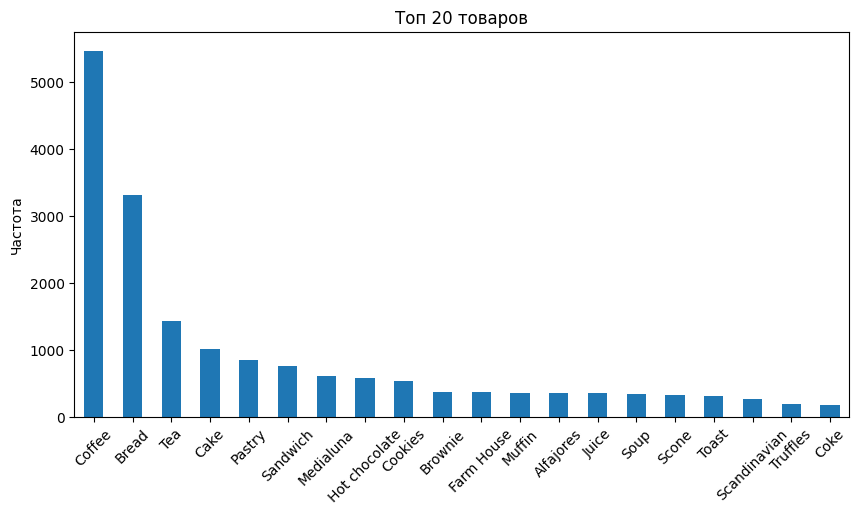

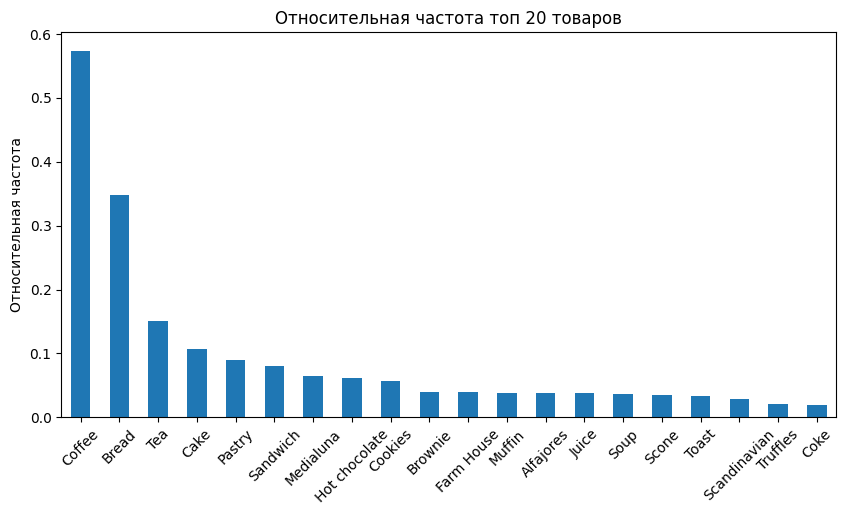

In [148]:
# 7. Визуализировать данные (отразить на гистограммах относительную и
# фактическую частоту встречаемости для 20 наиболее популярных товаров).
from collections import Counter
import matplotlib.pyplot as plt

items = df.stack().value_counts()
t20 = items.head(20)

plt.figure(figsize=(10,5))
t20.plot(kind='bar')
plt.title('Топ 20 товаров')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

rel = t20 / len(df)
plt.figure(figsize=(10,5))
rel.plot(kind='bar')
plt.title('Относительная частота топ 20 товаров')
plt.ylabel('Относительная частота')
plt.xticks(rotation=45)
plt.show()

In [149]:
# 8. Применить алгоритм Apriori, используя 3 разные библиотеки
# (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для
# алгоритмов так, чтобы выводилось порядка 10 наилучших правил.
from collections import Counter
import time

import pandas as pd
import matplotlib.pyplot as plt
from apriori_python import apriori as apriori_python
from apyori import apriori as apriori_apyori
from efficient_apriori import apriori as efficient_apriori
from fpgrowth_py import fpgrowth

def p10(rules):
    print(len(rules))
    for rule in sorted(rules, key=lambda r: r[2], reverse=True):
        print(rule)

def pf10(results):
    print(len(rules))
    for result in sorted(list(results), key=lambda r: r[2], reverse=True)[:10]:
        for subset in result[2]:
            print(subset[0], subset[1])
            print(f"Support: {result[1]}, Confidence: {subset[2]}, Lift: {subset[3]}")

def pe10(rules):
    print(len(rules))
    for rule in sorted(rules, key=lambda r: r.confidence, reverse=True):
        print(rule)

# позиции корзины (товары в покупке) – транзакции
transactions = df.stack().groupby(level=0).apply(list).tolist()

t_sec = dict()

start = time.perf_counter()
itemsets, rules = apriori_python(transactions, minSup=0.015, minConf=0.5)
t_sec['apriori_python'] = time.perf_counter() - start
print('apriori_python')
# формат вывода: [{'<Предпосылка>'}, {'<Правило>'}, '<Confidence>']
p10(rules)
print()

start = time.perf_counter()
results = apriori_apyori(transactions, min_support=0.015, min_confidence=0.5)
t_sec['apyori'] = time.perf_counter() - start
print('apyori')
pf10(list(results))
print()

start = time.perf_counter()
itemsets, rules = efficient_apriori(transactions, min_support=0.015, min_confidence=0.5)
print('efficient_apriori')
t_sec['efficient'] = time.perf_counter() - start
pe10(rules)

apriori_python
10
[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Scone'}, {'Coffee'}, 0.5229357798165137]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]

apyori
10
frozenset({'Alfajores'}) frozenset({'Coffee'})
Support: 0.019653423499577344, Confidence: 0.5406976744186046, Lift: 1.1301154573095569
frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05473372781065089, Confidence: 0.5269582909460835, Lift: 1.1013986893802417
frozenset({'Cookies'}) frozenset({'Coffee'})
Support: 0.028212172442941674, Confidence: 0.5184466019417476, Lift: 1.0836083570619919
frozenset({'Hot chocolate'}) frozenset({'Coffee'})
Support: 0.029585798816568046, Confidence: 0.5072463768115941,

In [150]:
# 9. Применить алгоритм FP-Growth из библиотеки fpgrowth_py.
# Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10
# наилучших правил.
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.022, minConf=0.5)
t_sec['FP-Growth'] = time.perf_counter() - start
p10(rules)
# формат вывода: [{'<Предпосылка>'}, {'<Правило>'}, '<Confidence>']

10
[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Scone'}, {'Coffee'}, 0.5229357798165137]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]


{'apriori_python': 0.3491355001460761, 'apyori': 4.0165847167372704e-05, 'efficient': 0.00501479092054069, 'FP-Growth': 0.11731349979527295}



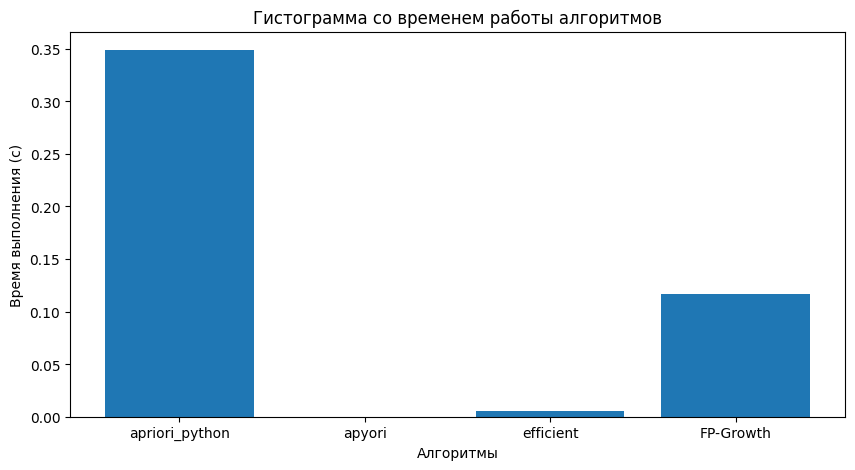

In [151]:
# 10. Сравнить время выполнения всех алгоритмов и построить гистограмму.
print(t_sec)
print()

plt.figure(figsize=(10,5))
plt.bar(t_sec.keys(), [round(v, 3) for v in t_sec.values()])
plt.title('Гистограмма со временем работы алгоритмов')
plt.xlabel('Алгоритмы')
plt.ylabel('Время выполнения (с)')
plt.show()

In [ ]:
# 11. Сформулировать выводы и сделать отчет.